In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#https://mp.weixin.qq.com/s/IoYSJA-ePTUKESgHtM0__Q

In [2]:
#导入波士顿房价数据集
rawdata = pd.read_table('housing.csv', sep = '\s+', header=None)
dataset = np.array(rawdata.values)
#data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
#(train_x, train_y), (test_x, test_y) = housing.load_data()
train_x = dataset[:, :-1].astype(float)
train_y = dataset[:, -1]
test_x = dataset[:, :-1]
test_y = dataset[:, -1]

In [3]:
#rawdata.head()
#rawdata.describe()
dataset.shape
#print (rawdata)

(506, 14)

In [4]:
#print (train_x)

In [5]:
from keras.models import Sequential, Model
from keras.layers import Dense
from tensorflow import random
from sklearn.metrics import mean_squared_error

#随机种子
np.random.seed(0)
random.set_seed(0)

#单层线性层的网络结构（也就是线性回归）：无隐藏层，由于是数值回归预测，输出层没有用激活函数
#model = Sequential()
#model.add(Dense(1,use_bias=False))  


#网络结构：输入层的特征维数为13，1层relu隐藏层，线性的输出层；
model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu',use_bias=False))
model.add(Dense(1,use_bias=False))  

#回归预测损失mse
model.compile(optimizer='adam', loss='mse')

In [6]:
#训练模型
model.fit (train_x, train_y, epochs=1000, verbose=False)
model.summary()
pred_y = model.predict(test_x)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [7]:
print("正确标签：",test_y)
print("模型预测：",pred_y )
print("实际与预测值的差异：",mean_squared_error(test_y,pred_y ))

正确标签： [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 

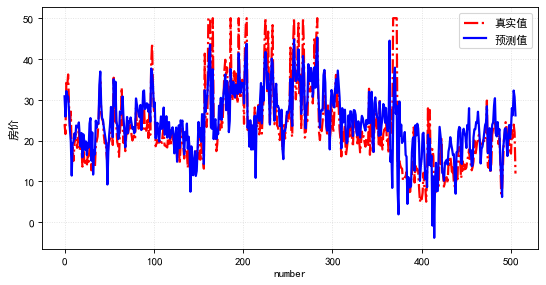

In [8]:
#绘图表示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#设置图形大小
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(range(len(test_y)), test_y, ls='-.',lw=2,c='r',label='真实值')
plt.plot(range(len(pred_y)), pred_y, ls='-',lw=2,c='b',label='预测值')

#绘制网格
plt.grid(alpha=0.4, linestyle=':')
plt.legend()
plt.xlabel('number')
plt.ylabel('房价')

#展示
plt.show()

In [9]:
model.layers[0].get_weights()

[array([[-1.57584772e-01, -3.32815260e-01,  3.61518860e-02,
          4.69033457e-02, -1.19137220e-01,  2.33699992e-01,
          2.63848919e-02,  5.08842885e-01, -3.36589059e-03,
         -3.82683814e-01],
        [-8.47188607e-02,  2.72332523e-02,  7.38106370e-02,
         -1.38155371e-01,  3.41768742e-01,  7.95739330e-03,
          9.87585261e-02,  1.65123880e-01,  3.42757434e-01,
         -4.24990147e-01],
        [ 5.73996007e-02, -5.86508334e-01,  2.31242359e-01,
          2.57235169e-01,  2.66490161e-01,  1.95373461e-01,
          2.09063411e-01, -4.62312043e-01, -4.34202462e-01,
          2.57157922e-01],
        [-2.93998027e+00, -4.64683652e-01, -2.13113248e-01,
         -3.98868412e-01,  1.61534548e+00, -2.18854547e+00,
         -1.43100250e+00,  4.92376626e-01, -6.10267043e-01,
         -3.66041660e-01],
        [-1.75480008e+00, -2.79228017e-02, -3.29005420e-01,
          5.37084602e-03,  1.47359586e+00, -1.54906988e+00,
         -1.21433198e+00,  9.96393561e-02, -5.639269

In [10]:
x0=train_x[0]
print("1、输入第一条样本x0:\n", x0)
 # 权重参数可以控制数据的特征表达再输出到下一层
w0= model.layers[0].get_weights()[0] 
print("2、第一层网络的权重参数w0:\n", w0) 

1、输入第一条样本x0:
 [6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
2、第一层网络的权重参数w0:
 [[-1.57584772e-01 -3.32815260e-01  3.61518860e-02  4.69033457e-02
  -1.19137220e-01  2.33699992e-01  2.63848919e-02  5.08842885e-01
  -3.36589059e-03 -3.82683814e-01]
 [-8.47188607e-02  2.72332523e-02  7.38106370e-02 -1.38155371e-01
   3.41768742e-01  7.95739330e-03  9.87585261e-02  1.65123880e-01
   3.42757434e-01 -4.24990147e-01]
 [ 5.73996007e-02 -5.86508334e-01  2.31242359e-01  2.57235169e-01
   2.66490161e-01  1.95373461e-01  2.09063411e-01 -4.62312043e-01
  -4.34202462e-01  2.57157922e-01]
 [-2.93998027e+00 -4.64683652e-01 -2.13113248e-01 -3.98868412e-01
   1.61534548e+00 -2.18854547e+00 -1.43100250e+00  4.92376626e-01
  -6.10267043e-01 -3.66041660e-01]
 [-1.75480008e+00 -2.79228017e-02 -3.29005420e-01  5.37084602e-03
   1.47359586e+00 -1.54906988e+00 -1.21433198e+00  9.96393561e-02
  -5.63926995e-01  3.11635852e-01]
 

In [11]:
a0 = np.maximum(0,np.dot(w0.T, x0)) 
#a0可以视为第一层网络层交互出的新特征，但其特征含义是比较模糊的
print("3、经过第一层神经网络relu(w0*x0)后输出:\n",a0) 
w1=model.layers[1].get_weights()[0] 
print("4、第二层网络的权重参数w1:\n", w1)  
#预测结果为w1与ao加权求和
a1 = np.dot(w1.T,a0)                                  
print("5、经过第二层神经网络w1*ao后输出预测值:%s,实际标签值为%s"%(a1[0],train_y[0]))  

3、经过第一层神经网络relu(w0*x0)后输出:
 [ 53.62493362   0.           0.           0.         328.67259583
  43.57277848 112.99403682   0.          37.00899908   0.        ]
4、第二层网络的权重参数w1:
 [[-0.34143656]
 [-0.3359894 ]
 [ 0.5390298 ]
 [ 0.388911  ]
 [ 0.43474424]
 [-0.30253264]
 [-0.6708156 ]
 [ 0.5517096 ]
 [-0.12860763]
 [-0.1673125 ]]
5、经过第二层神经网络w1*ao后输出预测值:30.839015704375655,实际标签值为24.0
